# Margin Activations

This notebook includes tensorboard visualizations, if you want to show them, please try to run it in your local machine.
Or you can run this demo in [colab](https://colab.research.google.com/drive/1w60qh4MdaEYdw7CN5jGw8xUWd7B4D2Es#scrollTo=mjvFj0nCMoQW).




## Activations

In triplet margin loss, we use $[margin + \bullet]_+$ for excluding "easy triplets".

In this project, we use the following activation functions:

- `relu`: $\max(x, 0)$
- `softplus`: $\ln(1 + \exp(x))$
- `leaky_relu`: $\max(x, 0) + \alpha \min(x, 0)$
- `hard_swish`: $x \cdot \max(0, \min(1, x + 3)) / 6$
- `selu`: $\lambda \cdot \max(0, x) + \alpha \cdot (\exp(\min(0, x)) - 1)$
- `celu`: $\max(0, x) + \min(0, \alpha \cdot (\exp(x / \alpha) - 1))$
- `gelu`: $x \cdot \Phi(x)$
- `silu`: $x \cdot \sigma(x)$
- `mish`: $x \cdot \tanh(\ln(1 + \exp(x)))$

and below show the plot of these functions.

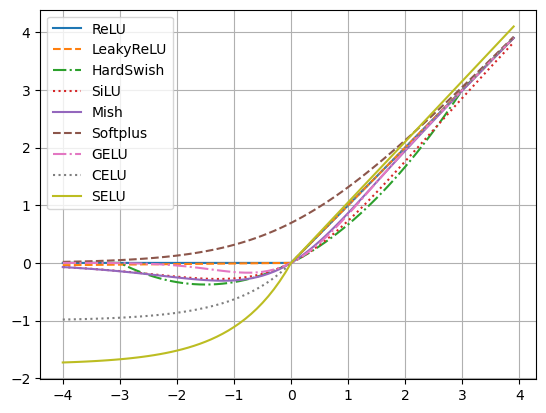

In [1]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
import numpy as np

x = np.arange(-4, 4, 0.1)

relu_y = F.relu(torch.tensor(x)).numpy()
leaky_relu_y = F.leaky_relu(torch.tensor(x)).numpy()
hard_swish_y = F.hardswish(torch.tensor(x)).numpy()
silu_y = F.silu(torch.tensor(x)).numpy()
mish_y = F.mish(torch.tensor(x)).numpy()
softplus_y = F.softplus(torch.tensor(x)).numpy()
gelu_y = F.gelu(torch.tensor(x)).numpy()
selu_y = F.selu(torch.tensor(x)).numpy()
celu_y = F.celu(torch.tensor(x)).numpy()

plt.plot(x, relu_y, label="ReLU", linestyle="-")
plt.plot(x, leaky_relu_y, label="LeakyReLU", linestyle="--")
plt.plot(x, hard_swish_y, label="HardSwish", linestyle="-.")
plt.plot(x, silu_y, label="SiLU", linestyle=":")
plt.plot(x, mish_y, label="Mish", linestyle="-")
plt.plot(x, softplus_y, label="Softplus", linestyle="--")
plt.plot(x, gelu_y, label="GELU", linestyle="-.")
plt.plot(x, celu_y, label="CELU", linestyle=":")
plt.plot(x, selu_y, label="SELU")

plt.legend()
plt.grid(visible=True)
plt.show()

## Experiments

Our experiments are based on the
1. CUB200-2011 dataset.
2. ResNet18 and ResNet50 backbone  
  with Adam optimizer (learning rate 1e-5, weight decay 1e-4)
3. Embedding size 64.  
  with Adam optimizer (learning rate 1e-4, weight decay 1e-4)
4. batch size 40.
5. max 200 epochs.
6. early stop (patience 5)
7. evaluate with Recall@1, Recall@2, Recall@4, Recall@8
8. margin: 0.2


We use the following settings for experiments:

1. no miner
2. batch easy hard miner

For this experiment, we execute [run.sh](./run.sh).

(This repo already include results of these experiments.)

(for showing results please install tensorboard)

### 1. No miner

source code: [no_miner.py](./src/no_miner.py)

In [12]:
%load_ext tensorboard

%tensorboard --logdir=results/no_miner --port=6009

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6009 (pid 20407), started 0:37:19 ago. (Use '!kill 20407' to kill it.)

### 2. Batch Easy Hard Miner

source code: [batch_easy_hard_miner.py](./src/batch_easy_hard_miner.py)

In [11]:
%tensorboard --logdir=repo/results/batch_easy_hard_miner --port=6012

Reusing TensorBoard on port 6012 (pid 21300), started 0:33:20 ago. (Use '!kill 21300' to kill it.)

You can also find csv file about result in [results directory](./results).

Below is our no mining visulaization results.

- No activation  
  ![no miner no](./imgs/no_miner_no.png)
- ReLU activation  
  ![no miner relu](./imgs/no_miner_relu.png)
- GELU activation
  ![no miner gelu](./imgs/no_miner_gelu.png)